# Trabalho Prático

Imports

In [116]:
!pip3 install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 509.3 kB/s eta 0:00:00a 0:00:01


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.impute import KNNImputer

### Leitura do Arquivo CSV:

In [80]:
data = pd.read_csv('heart2.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Tratamento de dados categóricos

In [81]:

label_data = ['Sex', 'ExerciseAngina', 'Oldpeak', 'RestingECG', 'ST_Slope']

one_hot_data = ['ChestPainType']

lb = LabelEncoder() 


for col in label_data:
    data[col] = lb.fit_transform(data[col])
    
#Use pandas get_dummies for one-hot encoding
data = pd.get_dummies(data, columns=one_hot_data)

data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,10,2,0,False,True,False,False
1,49,0,160,180,0,1,156,0,20,1,1,False,False,True,False
2,37,1,130,283,0,2,98,0,10,2,0,False,True,False,False
3,48,0,138,214,0,1,108,1,25,1,1,True,False,False,False
4,54,1,150,195,0,1,122,0,10,2,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,22,1,1,False,False,False,True
914,68,1,144,193,1,1,141,0,42,1,1,True,False,False,False
915,57,1,130,131,0,1,115,1,22,1,1,True,False,False,False
916,57,0,130,236,0,0,174,0,10,1,1,False,True,False,False


### Pre processamento

In [82]:
imputer = KNNImputer(missing_values=-1)
imputer.fit_transform(data)


array([[ 40.,   1., 140., ...,   1.,   0.,   0.],
       [ 49.,   0., 160., ...,   0.,   1.,   0.],
       [ 37.,   1., 130., ...,   1.,   0.,   0.],
       ...,
       [ 57.,   1., 130., ...,   0.,   0.,   0.],
       [ 57.,   0., 130., ...,   1.,   0.,   0.],
       [ 38.,   1., 138., ...,   0.,   1.,   0.]])

### Separar teste e treino

In [83]:

x = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20, random_state = 23)


## Árvore de decisão

### Criar modelo

In [89]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

#Teste do Modelo
prevision = modelo.predict(X_teste)


### Gerar matriz de confusão

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x156f6a010>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

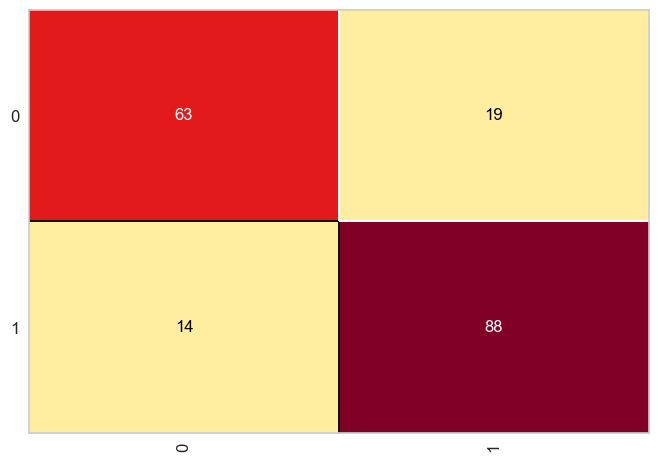

In [85]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, prevision)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

cm

In [86]:
print(classification_report(y_teste, prevision))
print(accuracy_score(y_teste, prevision))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

0.8206521739130435


### Plotando a árvore

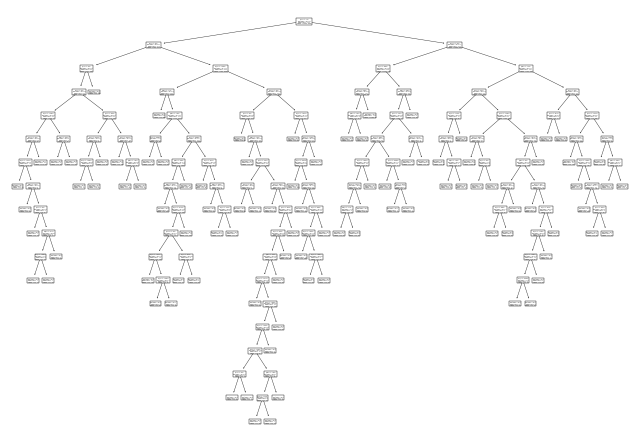

In [87]:
tree.plot_tree(Y)
plt.show()

## Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


model = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
model.fit(X_treino, y_treino)
prevision2 = model.predict(X_teste)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x157bd0e90>,
                estimator=RandomForestClassifier(max_features=3,
                                                 n_estimators=10,
                                                 random_state=0))

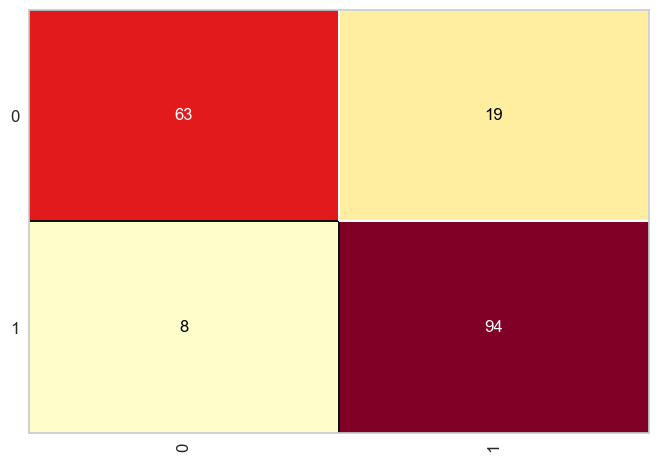

In [128]:
confusion_matrix(y_teste, prevision2)
cm2 = ConfusionMatrix(model)
cm2.fit(X_treino, y_treino)
cm2.score(X_teste, y_teste)

cm

In [129]:
print(classification_report(y_teste, prevision2))
print(accuracy_score(y_teste, prevision2))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        82
           1       0.83      0.92      0.87       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184

0.8532608695652174


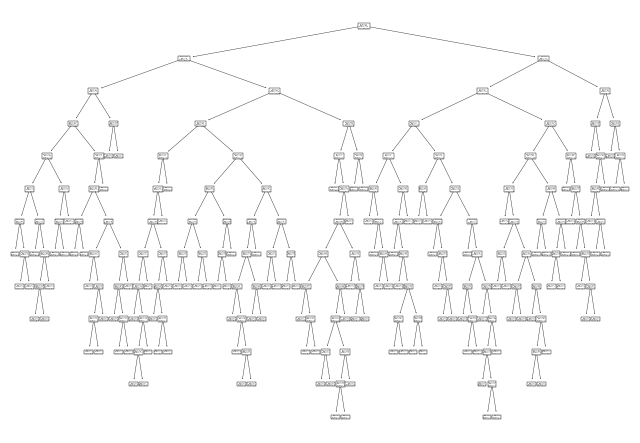

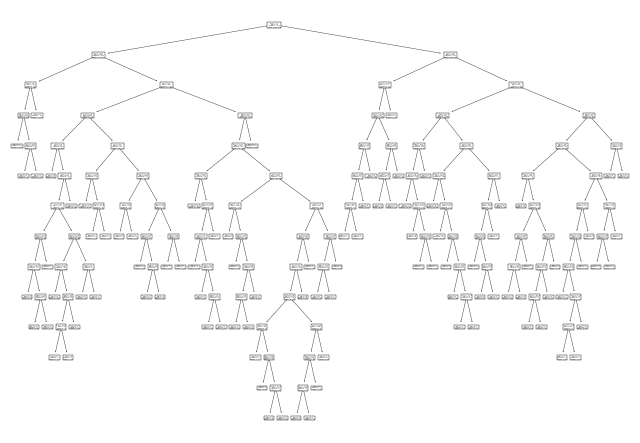

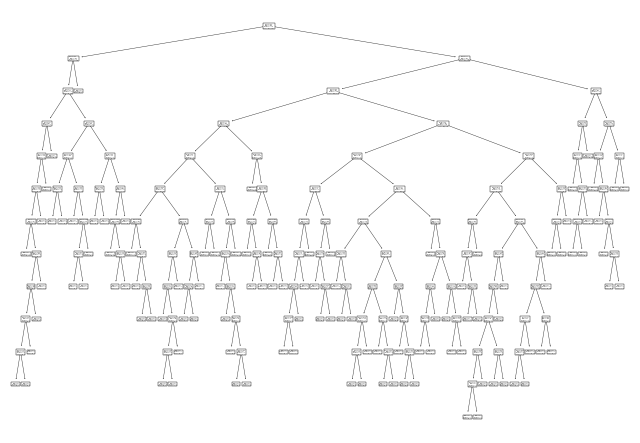

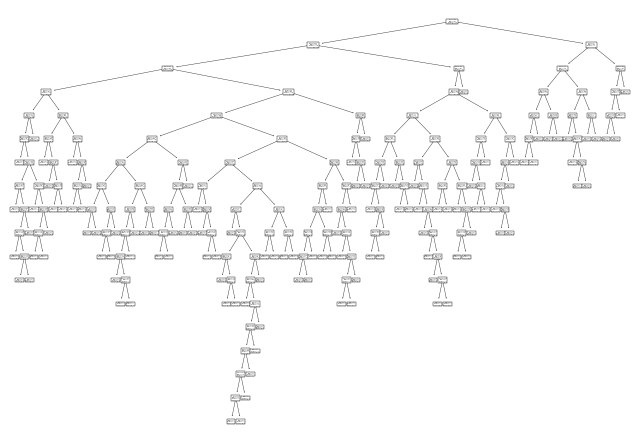

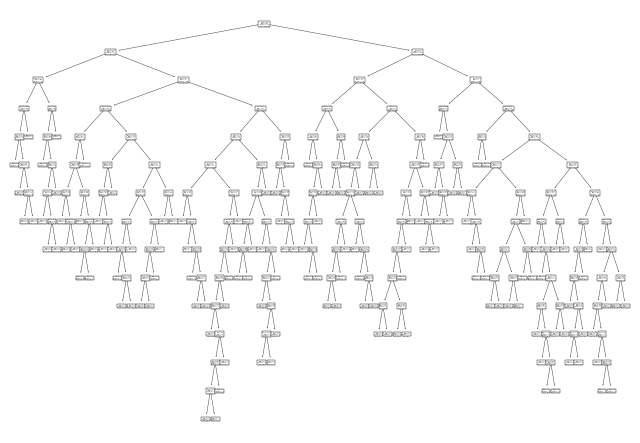

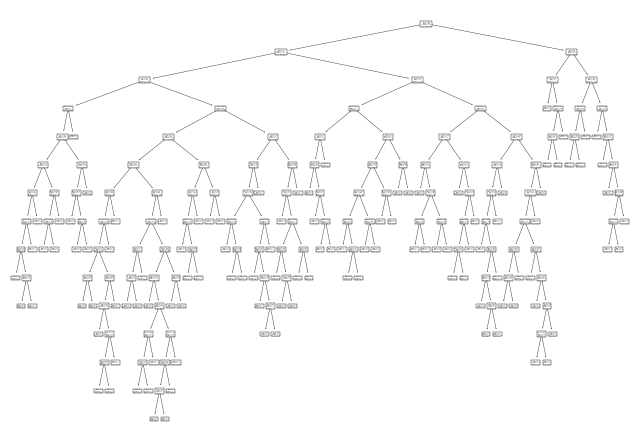

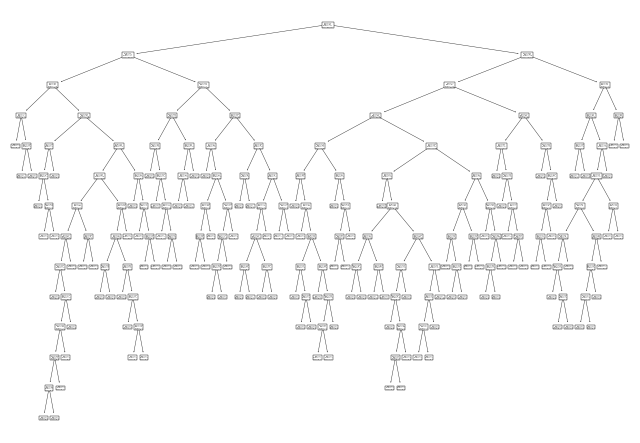

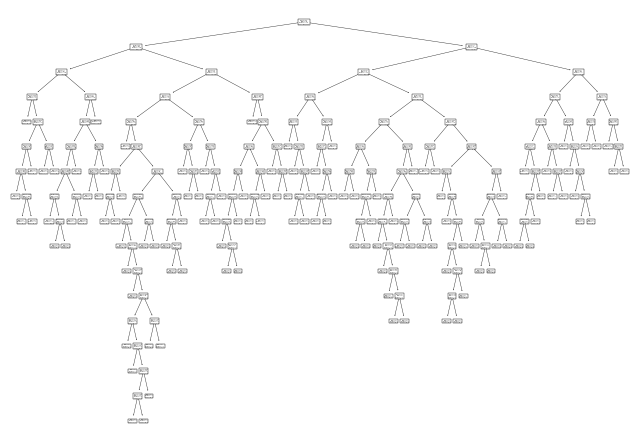

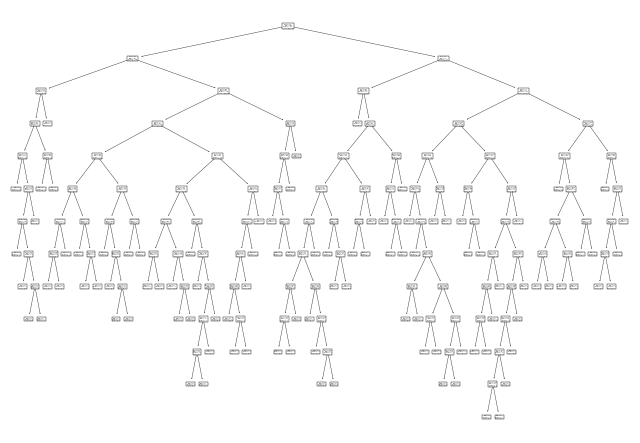

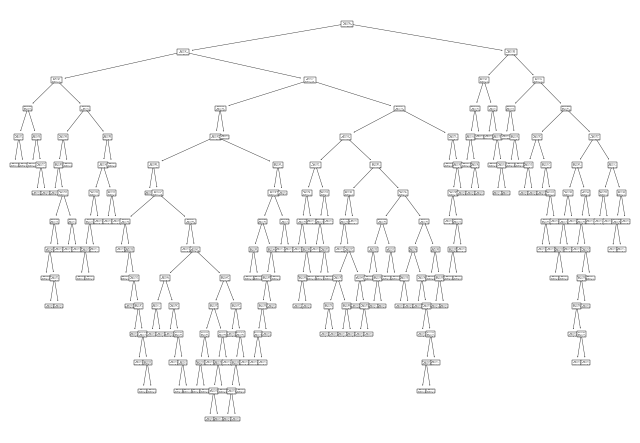

In [130]:


for decision_tree in model.estimators_:
   tree.plot_tree(decision_tree)
   plt.show() 
  